###Twitter data Sentiment analysis

- Ram Sirusanagandla

We are following 6 sequence of steps:

1.  Web Scrapping : Using the twitter developer account's API keys and access token's we are connecting to twitter account and scrapping the data from it for University of Massachusetts. This code is commented inorder to stop downloading the data again and again. 

2. Pre-processing: This step is used to used to clean the data like removing the unnecessary data from it. 

3. Feature Extraction: In this step, we are making the data into a format which is understandable by machine while removing all the unnecessary features so that dimensions will be reduced.

4. Model Training: Developing a model using embedding layer, LSTM, CNN, GRU, and dense output layers.

5. Model Evaluation: Evaluating the performace of the model using precision, recall, f1 score etc. 


##Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download()
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from nltk.sentiment.vader import SentimentIntensityAnalyzer

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to /root/nltk_data...
   


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


##Importing Tweepy API for pulling the data

Giving crediantials required to connect the twitter account

In [3]:
#twitter tokens
api_key = '29tMzoQLxrFo6RV5IDu3sAhFz'
api_key_secret = 'NWdWet690Y8aErS9LLrMcl1wZU2T1Q2KbgXYeeydiGR1nYScOB'
access_token = '1650530047776772097-68LyQE07QEEqATeHZoV4hQQHnhZLLK'
access_token_secret = 'w2np1IDOLvgkBYNVecW4uSQDwJ2aHkkpKO3HiEcMsKgLw'

In the below, code I'm commenting the csv conversion part because my tweets are already crapped , inorder to avoid the duplicating conflict I'm commenting that code. 

In [4]:
import tweepy
import configparser
import pandas as pd

# read configs
config = configparser.ConfigParser()
config.read('config.ini')

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()

# create dataframe
columns = [['Text', 'User', 'Date', 'Time']]
data = []
for tweet in public_tweets:
    data.append([tweet.text, tweet.user.screen_name, tweet.created_at.date(), tweet.created_at.time()])

df = pd.DataFrame(data, columns=columns)

#df.to_csv('UMassDataset_final.csv')   #UMassDataset_final.csv

## Pre-processsing

In [6]:
df = pd.read_csv("/content/UMassDataset_final.csv")

In [7]:
df.columns

Index(['Text', 'User', 'Date', 'Time'], dtype='object')

In [8]:
df['Text'].sample(20)

657     The #A10WTEN Championship bracket is set...🎾\n...
1606    🗓 1 day left until #UMassGives! Donate during ...
2562    In case you haven't heard, UMass Rowing is hav...
1697    Join our Flagship Summer Bootcamp and learn th...
1419    BOOM! #RedSox Christian Arroyo blasts his 1st ...
1496    Loved hearing these 2 guys together in the bro...
2751    Vladdy singles in a pair to cut #Redsox lead t...
135     RT @UMassFootball: Spring Game Vibes 💯\n\n#Fla...
2722    No reason Houck should have been out there for...
2036    Connor LONG DONG WONG has been very fun to wat...
51      Our starting lineup 🆚 Quinnipiac!\n\nSkagerlin...
1521    Today’s #RedSox lineup vs. TOR: Verdugo RF, Tu...
2080    #RedSox I’ve been beating the Wong drum all of...
1099    It's Day Two of #UMassGives—and your gift to t...
572     The Bobcats even the score on a RBI single\n\n...
2213    RT @coachFMartin: Hey #Umass we will build our...
1258                     ONG HE SHIT ON THAT BALL #RedSox
2439    UMass 

We can see that in the above text, there are emoji's and tags. We need to clean the data.

In [9]:
#Dropping the duplicates
Text = set(df['Text'].to_list())
df['Text']= pd.Series(list(Text))
df

,Text,User,Date,Time
0,RT @UMassAthletics: Congrats to our UMass Stud...,UMassBaseball,2023-05-03,20:48:23
1,On #Saturday Welcome #Aboard The #Flagship #Am...,TheCoachNat,2023-05-03,20:55:25
2,(Today’s #RedSox Bullpen Report)\n(5/2/23)\n\n...,UMassBaseball,2023-05-03,20:51:29
3,Please consider making a donation TODAY to sup...,ChrisPTucci,2023-05-03,20:47:41
4,We appreciate our Isenberg community🫶A huge sh...,ac_sbe,2023-05-03,20:46:10
...,...,...,...,...
2883,NaN,hatcrawler,2023-05-03,11:04:06
2884,NaN,SoxNH,2023-05-03,04:05:28
2885,NaN,Kaceyla73,2023-05-03,00:54:31
2886,NaN,TrueSophomore,2023-05-02,23:11:15


Checking whether data have dupicates or not.

If duplicates are present, dropping them is the best method becasue enough data is present to train the model. 

In [10]:
df.isnull().sum() #checking for null values.

Text    808
User      0
Date      0
Time      0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(2080, 4)

In [13]:
df.isnull().sum() #duplicates are dropped. 

Text    0
User    0
Date    0
Time    0
dtype: int64

In [14]:
print('Count of null values', end = ': ')
print(df["Text"].isnull().sum())

Count of null values: 0


Dataset has no duplicates and no null's in any column.

Now, we need to clean the text column in the dataframe. 

In [15]:
#in this, we are removing all the charcter with are not letters using regex. 
# Coverting the setence into list of tokens.
# Then, we are changing the words into its root form. 
# Now, the data is cleaned, changing again into string using join.
#stopwords.words('english')
#title = []
#for i in range(0, df.shape[0]):
#    title_1 = re.sub('[^a-zA-Z]',' ', df.iloc[i,1])
#    title_1 = title_1.lower()
#    title_1 = title_1.split()
#    title_1 = [i for i in title_1 if i not in stopwords.words('english')]
#    title_1 = [ps.stem(word) for word in title_1]
#    title_1 = ' '.join(title_1)
#    title.append(title_1)

Data has no null values but the extracted data from twitter is not orgainised. It has tags, hashtags, links, emoji's etc. 

Before building a model, cleaning this data has to be cleaned.

Let's define a function for that.

In [16]:
def data_processing(text):
    
    #converting all the data into lower case
    text = text.lower()

    #Removing tags
    text = re.sub(r"\@w+|\#",'',text)
    
    #Removing all the links
    text = re.sub(r"https\S+|www\S+|https\S+",'', text, flags = re.MULTILINE)   #it will search for patterns like https or www. or http\\www
    
    #Removing all other other than characters.
    text = re.sub(r'{^\w\s}','',text)
    text = re.sub('[^a-zA-Z]',' ', text)
    
    #Tokenizing inorder to remove all the extra spacing
    text_tokens = word_tokenize(text)
    
    #Stop words are words which doesn't contribute in building meaning of the sentence. 
    #Before vectorizing removing these will help in building vector with required words.
    stop_words = set(stopwords.words('english'))
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    #Joining all back
    return ' '.join(filtered_text)

In [17]:
#Calling the function and passing Text coulmn from dataframe, which is the feature column for the model.
df['Text'] = df['Text'].apply(data_processing)

In [18]:
#Let's have a look at the cleaned data. 
print(df['Text'])

0       rt umassathletics congrats umass student athle...
1       saturday welcome aboard flagship amsterdam ope...
2       today redsox bullpen report available pitch ke...
3       please consider making donation today support ...
4       appreciate isenberg community huge shoutout um...
                              ...                        
2075    third time predictable outcome tanner houck re...
2076    maclean hits triple sac fly tichy gives us ano...
2077                     mikey jensen takes hill flagship
2078    rt umasslacrosse wlax midfielder year amy more...
2079            fun spring made plays sides ball flagship
Name: Text, Length: 2080, dtype: object


In [19]:
print('Count of null values', end = ': ')
print(df["Text"].isnull().sum())

Count of null values: 0


In [20]:
len(df.Text)

2080

## Feature Extraction

With the above cleaning data, training of the model will be done.

Before defing the model, finding sentiments of each Text has to be done.

I've done the sentiment analysis manually for most of the data. 

Using BERT model for that, we can achieve that.

Here's the code for it.

In [21]:
features = df['Text']
X = features

In [344]:
#BERT model taken from web. BERT is a pre trained model. We just need to load it and pass the data ito it to get the sentiments.
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [345]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
def sentiment_value(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    t=int(torch.argmax(result.logits))+1
    if t>3:
        return "1"
    else:
        return "-1"
df['Sentiment_value'] = features.apply(lambda x: sentiment_value(x[:512]))

In [346]:
#As the data is having most of the postive reviews, I tried to drop some positive reviews to maintain the balance.
#rows_to_drop = df[df['Sentiment_value'] == 1].sample(n=200, random_state=42).index
#df = df.drop(rows_to_drop)

In [23]:
df['Sentiment_value'].isnull().sum()

0

In [24]:
df['Sentiment_value'].value_counts()

 1    1794
-1     286
Name: Sentiment_value, dtype: int64

In [25]:
type(df['Sentiment_value'])

pandas.core.series.Series

<Axes: xlabel='Sentiment_value', ylabel='count'>

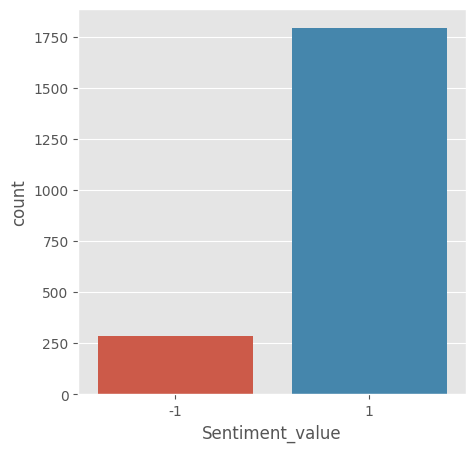

In [26]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x= 'Sentiment_value', data = df)

In [351]:
#Checking for some data.
test = "Not a great campus"
test_output = sentiment_value(test)
test_output

'-1'

In [352]:
test1 = "Campus provides everything for everyone "
test_output1 = sentiment_value(test1)
test_output1

'1'

In [27]:
y = df['Sentiment_value']

Using Bag of words and TFIDF for feature extraction.

In [28]:
#using tokenizer to remove all the extra spacing and then makinh each sentence of equal length using padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

In [29]:
maxlen = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=maxlen)
X = np.asarray(X).astype(np.float32)
y = np.asarray(df["Sentiment_value"]).astype(np.float32)

In [30]:
features = df['Text']
X = features

In [31]:
#Bag of words 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [32]:
#TF IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

#Fitting the mdoel for the data
tfidf_transformer.fit(X)

#Transforming the data
X  = tfidf_transformer.transform(X)


In [33]:
sentiment_data = y

In [34]:
df["Sentiment_value"].isnull().sum()

0

In [35]:
maxlen = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=maxlen)
X = np.asarray(X).astype(np.float32)
y = np.asarray(df["Sentiment_value"]).astype(np.float32)

In [36]:
type(sentiment_data)

numpy.ndarray

## Model Creation

In [37]:
#splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, sentiment_data, test_size=0.3, random_state=42)

In [38]:
X_train.shape


(1456, 38)

In [39]:
X_test.shape

(624, 38)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
#increasing the dimensinality of the training dataset.
#X_train = np.expand_dims(X_train, -1)
#y_train   = np.expand_dims(y_train, -1)
#X_train.shape

In [42]:
size_of_words= len(tokenizer.word_index)+1
print(size_of_words)
embedding_vect_dim = 32

5184


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l2

In [44]:
#Creaing a sequential model with Embedding, LSTM, Conv, GRU,, Dense layers in it with appropriate count. 
#Using maxpooling to reduce dimensionality and using regularization and dropout to avoid overfitting
#Using ReLu activation function for the dense layers and sigmoid for the output layer as this is a classification problem.
model = Sequential()
model.add(Embedding(size_of_words, 64, input_length = maxlen))
model.add(LSTM(64,dropout = 0.4, recurrent_dropout = 0.4, return_sequences=True))
model.add(Conv1D(64, 7, activation = 'relu'))
model.add(MaxPooling1D(6))
model.add(Dropout(0.5))
model.add(GRU(64, dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 64)            331776    
                                                                 
 lstm (LSTM)                 (None, 38, 64)            33024     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            28736     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                        

In [46]:
# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
#this is used to stop the model when the loss is increasing for 5 consecutives epochs
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [48]:
#fitting the data and executing the model.
model_run = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
19/19 [==============================] - 10s 155ms/step - loss: 1.2054 - accuracy: 0.8110 - val_loss: 0.9960 - val_accuracy: 0.8973
Epoch 2/30
19/19 [==============================] - 2s 109ms/step - loss: 1.0508 - accuracy: 0.8634 - val_loss: 0.9453 - val_accuracy: 0.8973
Epoch 3/30
19/19 [==============================] - 3s 172ms/step - loss: 0.9635 - accuracy: 0.8643 - val_loss: 0.8386 - val_accuracy: 0.8973
Epoch 4/30
19/19 [==============================] - 3s 162ms/step - loss: 0.8674 - accuracy: 0.8651 - val_loss: 0.7682 - val_accuracy: 0.8973
Epoch 5/30
19/19 [==============================] - 2s 106ms/step - loss: 0.7636 - accuracy: 0.8634 - val_loss: 0.6544 - val_accuracy: 0.8870
Epoch 6/30
19/19 [==============================] - 2s 109ms/step - loss: 0.5248 - accuracy: 0.8462 - val_loss: 0.6430 - val_accuracy: 0.7021
Epoch 7/30
19/19 [==============================] - 2s 113ms/step - loss: -0.0953 - accuracy: 0.8041 - val_loss: 0.5794 - val_accuracy: 0.7842
Epoc

In [49]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 15ms/step - loss: -48.3970 - accuracy: 0.7885


In [50]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)

46/46 [==============================] - 1s 20ms/step - loss: -120.6405 - accuracy: 0.8620


Accuracy is good for a simple model like this. 

Let's look how weel it performs on the test data and new data.

In [51]:
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Test Loss: -48.396995544433594
Test Accuracy: 0.7884615659713745
20/20 [==============================] - 2s 28ms/step


Let's plot the graph. 

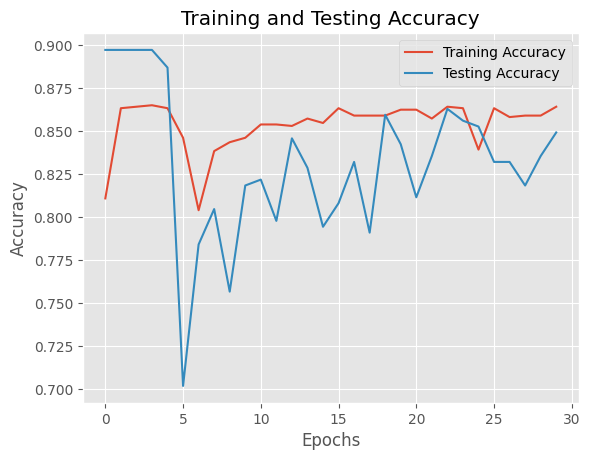

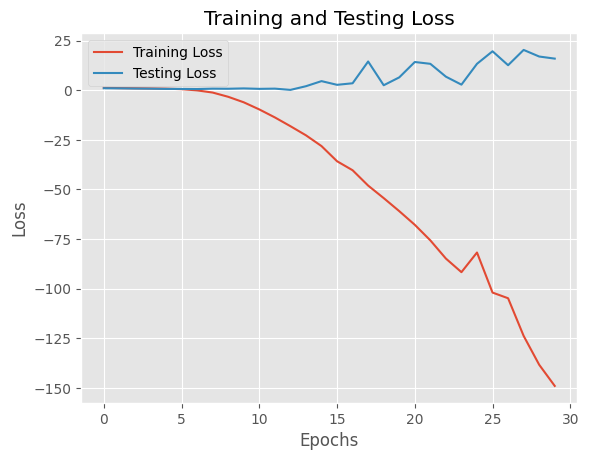

In [52]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(model_run.history['accuracy'], label='Training Accuracy')
plt.plot(model_run.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(model_run.history['loss'], label='Training Loss')
plt.plot(model_run.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Prediction

In [53]:
def prediction_fn(sentence):
    sent = [data_processing(sentence)]
    sequences = tokenizer.texts_to_sequences(sent)
    pred = model.predict(pad_sequences(sequences, maxlen=maxlen))
    labels = (pred >= 0.5).astype(int) 
    
    if labels[0] == 0:
        print("Negative")
    else:
        print("Positive")
    print("")

In [54]:
#Predicting for unseen sentences
positive_sentences = [   "UMass offers a diverse range of academic programs and majors.",
                      "The campus facilities at UMass are modern and well-equipped.",
                      "UMass provides ample opportunities for student research and internships.",
                      "The faculty at UMass are highly knowledgeable and supportive.",
                      "The UMass community fosters a strong sense of belonging and inclusivity.",
                      "UMass offers a vibrant and active student life with various clubs and organizations.",
                      "The career services at UMass are dedicated to helping students succeed.",
                      "UMass is located in a great area", 
                      "The staff at UMass are always helpful",
                      "UMass has a beautiful campus with plenty of green spaces."]

for sent in positive_sentences:
    prediction_fn(sent)

1/1 [==============================] - 1s 811ms/step
Positive

1/1 [==============================] - 0s 27ms/step
Positive

1/1 [==============================] - 0s 35ms/step
Positive

1/1 [==============================] - 0s 27ms/step
Positive

1/1 [==============================] - 0s 26ms/step
Positive

1/1 [==============================] - 0s 31ms/step
Positive

1/1 [==============================] - 0s 34ms/step
Positive

1/1 [==============================] - 0s 26ms/step
Positive

1/1 [==============================] - 0s 33ms/step
Positive

1/1 [==============================] - 0s 30ms/step
Positive



In [55]:
negative_sentences = ["Never expected environment",    "Bad university in for Massuchu",    "Fee is very high, bad situation for students,  not recommended"]

for sent in negative_sentences:
    prediction_fn(sent)

1/1 [==============================] - 0s 31ms/step
Positive

1/1 [==============================] - 0s 29ms/step
Positive

1/1 [==============================] - 0s 28ms/step
Positive



Model is not able to predict for soem negative sentences.  It might be overfitted. 

Let's check the scores

20/20 [==============================] - 0s 14ms/step
Accuracy: 0.71111
Precision: 0.506
Recall: 0.711
F1-score: 0.5671


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


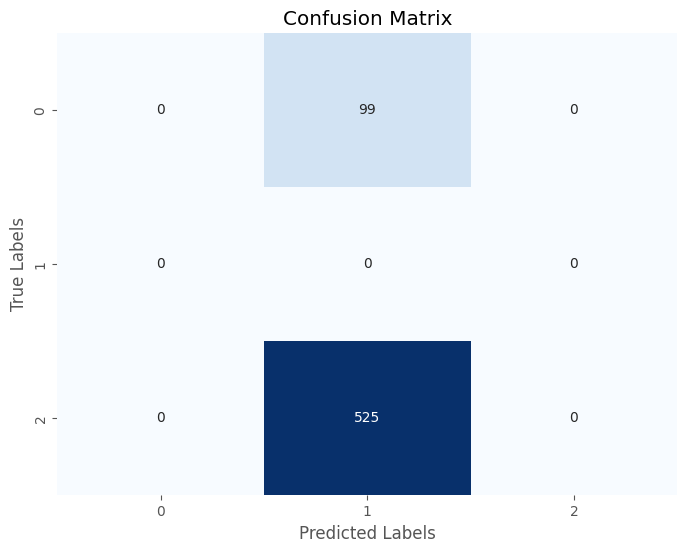

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# predictions on the testing set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precison)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()